In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# os.chdir("E:\ComputerScience\Sem2\ML\Assignment1\Assignmenst1_DecisionTree\Files")
path = "amazon_baby_train.csv"
print("Reading dataset:")
sms = pd.read_table(path, header=None, sep=',', names=['name', 'review', 'rating'])
data_clean = sms.dropna()

Reading dataset:


In [3]:
# Add column to identify if rating is good= 1 and bad = 0
data_clean['rating_num'] = data_clean.rating.map({'1': 0, '2': 0, '3': 1, '4': 1, '5': 1})
data_clean = data_clean[data_clean.rating_num != None]
data_clean = data_clean.drop(data_clean.index[[0]])
data_clean['rating_num'] = data_clean['rating_num'].apply(np.int64)

C:\Users\ashik\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [4]:
# how to define X and y for use with COUNTVECTORIZER
X = data_clean.review
y = data_clean.rating_num
print(X.shape)
print(y.shape)

(145927,)
(145927,)


In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87556,)
(58371,)
(87556,)
(58371,)


In [7]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)
print("After fit transform")
X_test_dtm = vect.transform(X_test)
# print(X_test_dtm)

After fit transform


In [8]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=
(2),solver='sgd',learning_rate_init=0.001,max_iter=100)
# train the model using X_train_dtm (timing it with an IPython "magic command")
classifier = classifier.fit(X_train_dtm, y_train)

C:\Users\ashik\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [9]:
# make class predictions for X_test_dtm
y_pred_class = classifier.predict(X_test_dtm)
# print(y_pred_class)
# print(y_test)
print("Training Accuracy: %f" % classifier.score(X_test_dtm, y_test))
print("Training set loss: %f" % classifier.loss_)

Training Accuracy: 0.913245
Training set loss: 0.157383


In [10]:
import sklearn.metrics

# print the confusion matrix
#sklearn.metrics.confusion_matrix(y_test.astype(int), y_pred_class)
#print("Training Accuracy:")

#print(sklearn.metrics.accuracy_score(y_test, y_pred_class))

####################################################################################
# For Testing data

testpath = "amazon_baby_test.csv"
test_data = pd.read_table(testpath, header=None, sep=',', names=['name', 'review', 'rating'])

test_data_clean = test_data.dropna()

In [11]:
# convert label to a numerical variable
test_data_clean['rating_num'] = test_data_clean.rating.map({'1': 0, '2': 0, '3': 1, '4': 1, '5': 1})
test_data_clean = test_data_clean[test_data_clean.rating_num != None]
test_data_clean = test_data_clean.drop(test_data_clean.index[[0]])
test_data_clean['rating_num'] = test_data_clean['rating_num'].apply(np.int64)

C:\Users\ashik\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [12]:
XT_train = data_clean.review
YT_train = data_clean.rating_num

XT_test = test_data_clean.review
YT_test = test_data_clean.rating_num

In [13]:
newvect = CountVectorizer()
newvect.fit(XT_train)
XT_train_dtm = vect.transform(XT_train)
XT_train_dtm = vect.fit_transform(XT_train)
XT_test_dtm = vect.transform(XT_test)

In [14]:
new_classifier = MLPClassifier(hidden_layer_sizes=
(2),solver='sgd',learning_rate_init=0.001,max_iter=100)
new_classifier = new_classifier.fit(XT_train_dtm, YT_train)
print("------------------------------------------------------------------------")
new_predictions = new_classifier.predict(XT_test_dtm)
# print(new_predictions)
print("Testing Accuracy: %f"  % classifier.score(XT_test_dtm, YT_test))
print("Testing set loss: %f" % new_classifier.loss_)
print("Execution completed.")

C:\Users\ashik\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


------------------------------------------------------------------------


ValueError: dimension mismatch

In [16]:
new_classifier = MLPClassifier(hidden_layer_sizes=
(2),solver='sgd',learning_rate_init=0.001,max_iter=100)
new_classifier = new_classifier.fit(XT_train_dtm, YT_train)
print("------------------------------------------------------------------------")
new_predictions = new_classifier.predict(XT_test_dtm)
# print(new_predictions)
#print("Testing Accuracy: %f"  % classifier.score(XT_test_dtm, YT_test))
#print("Testing set loss: %f" % new_classifier.loss_)
sklearn.metrics.confusion_matrix(YT_test.astype(int), new_predictions)
print("Testing Accuracy:")
print(sklearn.metrics.accuracy_score(YT_test.astype(int), new_predictions))
print("Execution completed.")

------------------------------------------------------------------------
Testing Accuracy:
0.916120360973
Execution completed.


C:\Users\ashik\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


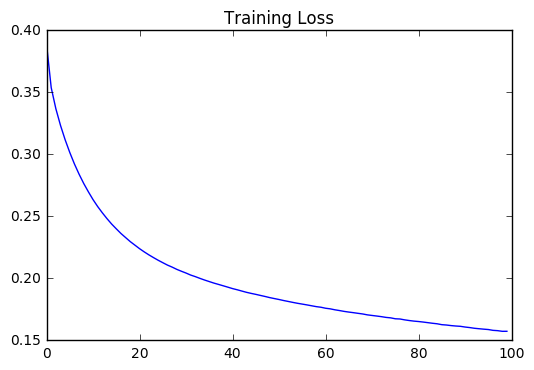

In [18]:
import matplotlib.pyplot as plt
plt.title("Training Loss")
plt.plot(classifier.loss_curve_)
plt.show()